# Grid search
En este ejercicio vamos a realizar una busqueda de los hyperparametros de un modelo

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
digits = datasets.load_digits() 
print(digits["target_names"])

# Renombrar datos
df = pd.DataFrame(digits.data)
y = digits.target


[0 1 2 3 4 5 6 7 8 9]


This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format. 

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this. 

### Preanálisis los datos
Lo primero siempre es comprobar los datos

In [13]:
fila = df.iloc[100] # Selecciono una fila
fila = np.asarray(fila) # Transformo en array
#fila
reshaped = np.reshape(fila, (8,8))
reshaped

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

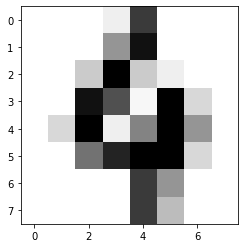

In [14]:
plt.imshow(reshaped, interpolation='nearest', cmap='Greys',)
plt.show()

In [16]:
# y[100]

## Train Test

In [17]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)


# Grid Search con Super Vector Classification
The multiclass support is handled according to a one-vs-one scheme.

kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

C : float, optional (default=1.0)
Penalty parameter C of the error term.

gamma : float, optional (default=’auto’)
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

In [21]:
# Creamos una malla de hyperparametros
tuned_parameters = [{'kernel': ['rbf', 'linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [22]:
tuned_parameters

[{'kernel': ['rbf', 'linear'],
  'gamma': [0.001, 0.0001],
  'C': [1, 10, 100, 1000]}]

In [23]:
for score in ['precision']:
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Mejores parametros en train:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores en validation:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()


Mejores parametros en train:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores en validation:

0.988 (+/-0.009) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.959 (+/-0.017) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.988 (+/-0.009) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.986 (+/-0.006) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.988 (+/-0.009) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.985 (+/-0.013) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}
0.988 (+/-0.009) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 1000, 'gamma':

In [24]:
clf_fitted = SVC(C= 1, gamma= 0.001, kernel= 'rbf')
clf_fitted.fit(X_train, y_train)

print("Score en test:", clf_fitted.score(X_test, y_test))

Score en test: 0.9819193324061196


# Grid Search con Random Forest
Parameters:	
n_estimators : integer, optional (default=10)
The number of trees in the forest.

Changed in version 0.20: The default value of n_estimators will change from 10 in version 0.20 to 100 in version 0.22.

criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
Changed in version 0.18: Added float values for fractions.

min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
Changed in version 0.18: Added float values for fractions.

min_weight_fraction_leaf : float, optional (default=0.)
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

max_leaf_nodes : int or None, optional (default=None)
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decrease : float, optional (default=0.)
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:

N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.

N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

New in version 0.19.

min_impurity_split : float, (default=1e-7)
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

Deprecated since version 0.19: min_impurity_split has been deprecated in favor of min_impurity_decrease in 0.19. The default value of min_impurity_split will change from 1e-7 to 0 in 0.23 and it will be removed in 0.25. Use min_impurity_decrease instead.
bootstrap : boolean, optional (default=True)
Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

oob_score : bool (default=False)
Whether to use out-of-bag samples to estimate the generalization accuracy.

n_jobs : int or None, optional (default=None)
The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

verbose : int, optional (default=0)
Controls the verbosity when fitting and predicting.

warm_start : bool, optional (default=False)
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See the Glossary.

class_weight : dict, list of dicts, “balanced”, “balanced_subsample” or None, optional (default=None)
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

For multi-output, the weights of each column of y will be multiplied.

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Creamos una malla de hyperparametros
tuned_parameters = [{'n_estimators': [80, 100, 120, 140], 'max_depth': [2,5,None],
                     'min_samples_split': [3]}]

In [32]:
for score in ['precision']:

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Mejores parametros en train:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores en validation:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()


Mejores parametros en train:

{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 80}

Grid scores en validation:

0.867 (+/-0.019) for {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 80}
0.862 (+/-0.042) for {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 100}
0.871 (+/-0.040) for {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 120}
0.871 (+/-0.026) for {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 140}
0.942 (+/-0.034) for {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 80}
0.944 (+/-0.030) for {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}
0.937 (+/-0.036) for {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 120}
0.946 (+/-0.023) for {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 140}
0.972 (+/-0.011) for {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 80}
0.968 (+/-0.018) for {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 100}
0.964 (+/-0.020) for {'max_depth': None, 'mi

In [33]:
clf_fitted = RandomForestClassifier(max_depth= None, min_samples_split= 3, n_estimators= 80)
clf_fitted.fit(X_train, y_train)

print("Score en test:", clf_fitted.score(X_test, y_test))

Score en test: 0.9680111265646731


In [34]:
clf_fitted.feature_importances_

array([0.00000000e+00, 1.69915467e-03, 2.14953626e-02, 9.61531910e-03,
       9.45749280e-03, 1.78624068e-02, 6.68981528e-03, 4.92563300e-04,
       1.42244959e-04, 1.09391085e-02, 2.55758010e-02, 6.13510343e-03,
       1.46948756e-02, 2.90890323e-02, 4.13231452e-03, 6.04434133e-04,
       8.59701469e-05, 6.85725271e-03, 2.45756975e-02, 2.83175300e-02,
       2.87130166e-02, 4.63814466e-02, 7.57629275e-03, 1.83375282e-04,
       4.15782349e-05, 1.30816397e-02, 4.09392354e-02, 2.87064642e-02,
       3.55553529e-02, 1.67995034e-02, 3.48466725e-02, 0.00000000e+00,
       0.00000000e+00, 3.50112131e-02, 2.52476933e-02, 1.90437884e-02,
       4.18085877e-02, 2.01690673e-02, 2.29674175e-02, 0.00000000e+00,
       6.14457222e-05, 1.19364346e-02, 3.94502221e-02, 3.92168625e-02,
       2.24435807e-02, 1.69300108e-02, 1.97587368e-02, 2.11043456e-04,
       0.00000000e+00, 2.32590996e-03, 1.96113869e-02, 2.46271355e-02,
       1.37753035e-02, 2.18248159e-02, 2.39850988e-02, 1.69897831e-03,
      